In [5]:
# Importamos librerías necesarias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Extraemos datos 
suicidios = pd.read_excel("Suicidios_raw.xlsx")
suicidios = pd.DataFrame(suicidios)

In [7]:
suicidios.head()

,Grupo Etario,Sexo,Suicidios,Año
0,De 10 a 14 años,Mujeres,27,2014
1,De 10 a 14 años,Hombres,36,2014
2,De 100 años y más,Mujeres,0,2014
3,De 100 años y más,Hombres,0,2014
4,De 15 a 19 años,Mujeres,86,2014


In [8]:
# Categorizamos y ordenamos datos 
suicidios["Grupo Etario"] = suicidios["Grupo Etario"].astype("category")
suicidios["Grupo Etario"].cat.reorder_categories\
(["De 2 a 4 años","De 5 a 9 años","De 10 a 14 años","De 15 a 19 años","De 20 a 24 años","De 25 a 29 años","De 30 a 34 años",\
"De 35 a 39 años","De 40 a 44 años","De 45 a 49 años","De 50 a 54 años","De 55 a 59 años","De 60 a 64 años","De 65 a 69 años",\
"De 70 a 74 años","De 75 a 79 años","De 80 a 84 años","De 85 a 89 años","De 90 a 94 años","De 95 a 99 años","De 100 años y más",\
"Edad desconocida"], inplace=True)

suicidios["Grupo Etario"] = suicidios["Grupo Etario"].cat.remove_categories(removals=\
["De 75 a 79 años","De 80 a 84 años","De 85 a 89 años","De 90 a 94 años","De 95 a 99 años","De 100 años y más","Edad desconocida"])
    
suicidios["Grupo Etario"] = suicidios["Grupo Etario"].cat.add_categories(">= 75 años").fillna(">= 75 años")

suicidios["Grupo Etario"] = suicidios["Grupo Etario"].cat.remove_categories(removals=["De 2 a 4 años","De 5 a 9 años"])
suicidios["Grupo Etario"] = suicidios["Grupo Etario"].cat.add_categories("Menores de 10 años").fillna("Menores de 10 años")

suicidios["Grupo Etario"].cat.reorder_categories\
(["Menores de 10 años","De 10 a 14 años","De 15 a 19 años","De 20 a 24 años","De 25 a 29 años","De 30 a 34 años",\
"De 35 a 39 años","De 40 a 44 años","De 45 a 49 años","De 50 a 54 años","De 55 a 59 años","De 60 a 64 años","De 65 a 69 años",\
"De 70 a 74 años",">= 75 años"], inplace=True)


/var/folders/s0/s2p35dd90rsdl_zhx8r_j3bh0000gn/T/ipykernel_7224/1070135924.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  suicidios["Grupo Etario"].cat.reorder_categories\
/var/folders/s0/s2p35dd90rsdl_zhx8r_j3bh0000gn/T/ipykernel_7224/1070135924.py:17: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  suicidios["Grupo Etario"].cat.reorder_categories\


In [9]:
# Observamos Df con nuevas categorías
suicidios["Grupo Etario"].unique().value_counts()

Menores de 10 años    1
De 10 a 14 años       1
De 15 a 19 años       1
De 20 a 24 años       1
De 25 a 29 años       1
De 30 a 34 años       1
De 35 a 39 años       1
De 40 a 44 años       1
De 45 a 49 años       1
De 50 a 54 años       1
De 55 a 59 años       1
De 60 a 64 años       1
De 65 a 69 años       1
De 70 a 74 años       1
>= 75 años            1
dtype: int64

In [10]:
# Separamos DF por sexo 
hombres = suicidios.loc[suicidios["Sexo"] == "Hombres"]
hombres = hombres.groupby("Año")["Suicidios"].sum()
hombres = pd.DataFrame(hombres)

mujeres = suicidios.loc[suicidios["Sexo"] == "Mujeres"]
mujeres = mujeres.groupby("Año")["Suicidios"].sum()
mujeres = pd.DataFrame(mujeres)

In [11]:
# Visualizamos dfs de sexo para corroborar
print(hombres.head())
print(mujeres.head())

      Suicidios
Año            
2014       1764
2015       1863
2016       2034
2017       2204
2018       2228
      Suicidios
Año            
2014        372
2015        485
2016        448
2017        507
2018        488


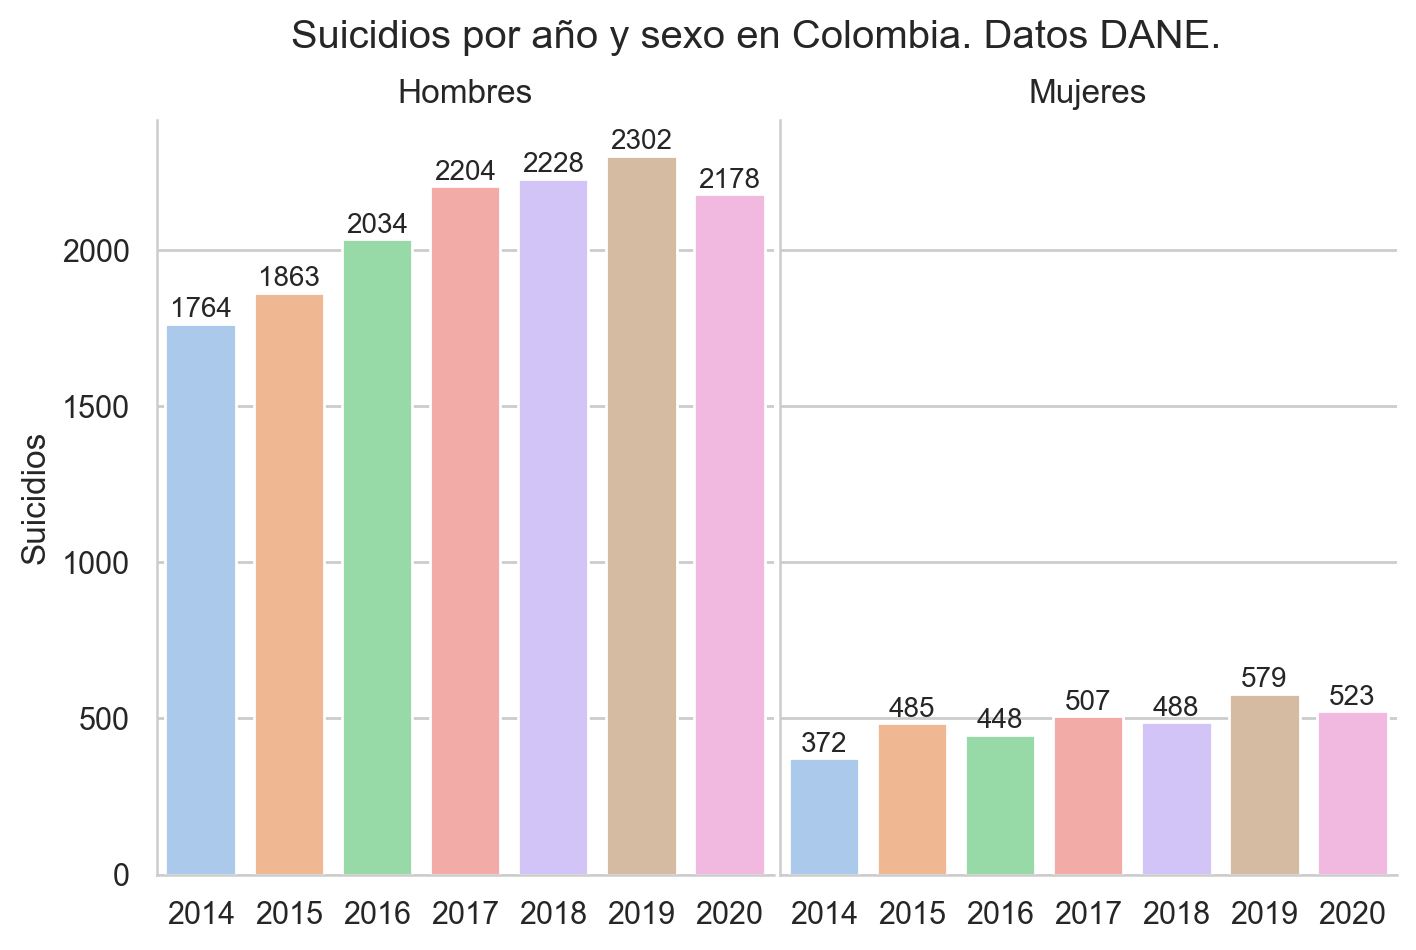

In [12]:
# Ploteamos datos anuales por sexo 
sns.set_theme(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(1,2, figsize=(8,5), sharey=True, dpi=200)
fig.suptitle("Suicidios por año y sexo en Colombia. Datos DANE.", fontweight="light")

ax1 = sns.barplot(ax=axes[0], x=hombres.index, y=hombres.Suicidios, ci=None)
axes[0].set_title("Hombres")
axes[0].set_ylabel("Suicidios")
axes[0].set_xlabel(None)
axes[0].tick_params(bottom=False)

ax2 = sns.barplot(ax=axes[1], x=mujeres.index, y=mujeres.Suicidios, ci=None)
axes[1].set_title("Mujeres")
axes[1].set_ylabel(None)
axes[1].set_xlabel(None)
axes[1].tick_params(bottom=False, left=False)


for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(0.9)
    ax2.spines[axis].set_linewidth(0.9)
    
for spines in ["top", "right"]:
    ax1.spines[spines].set_visible(False)
    ax2.spines[spines].set_visible(False)


for bar in ax1.patches:
    ax1.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center', rotation=0,
    size=10, xytext=(0, 5), #inicialmente en (0,5)
    textcoords='offset points')
    
for bar in ax2.patches:
    ax2.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center', rotation=0,
    size=10, xytext=(0, 5), #inicialmente en (0,5)
    textcoords='offset points')

plt.subplots_adjust(wspace=0.01)
plt.show()

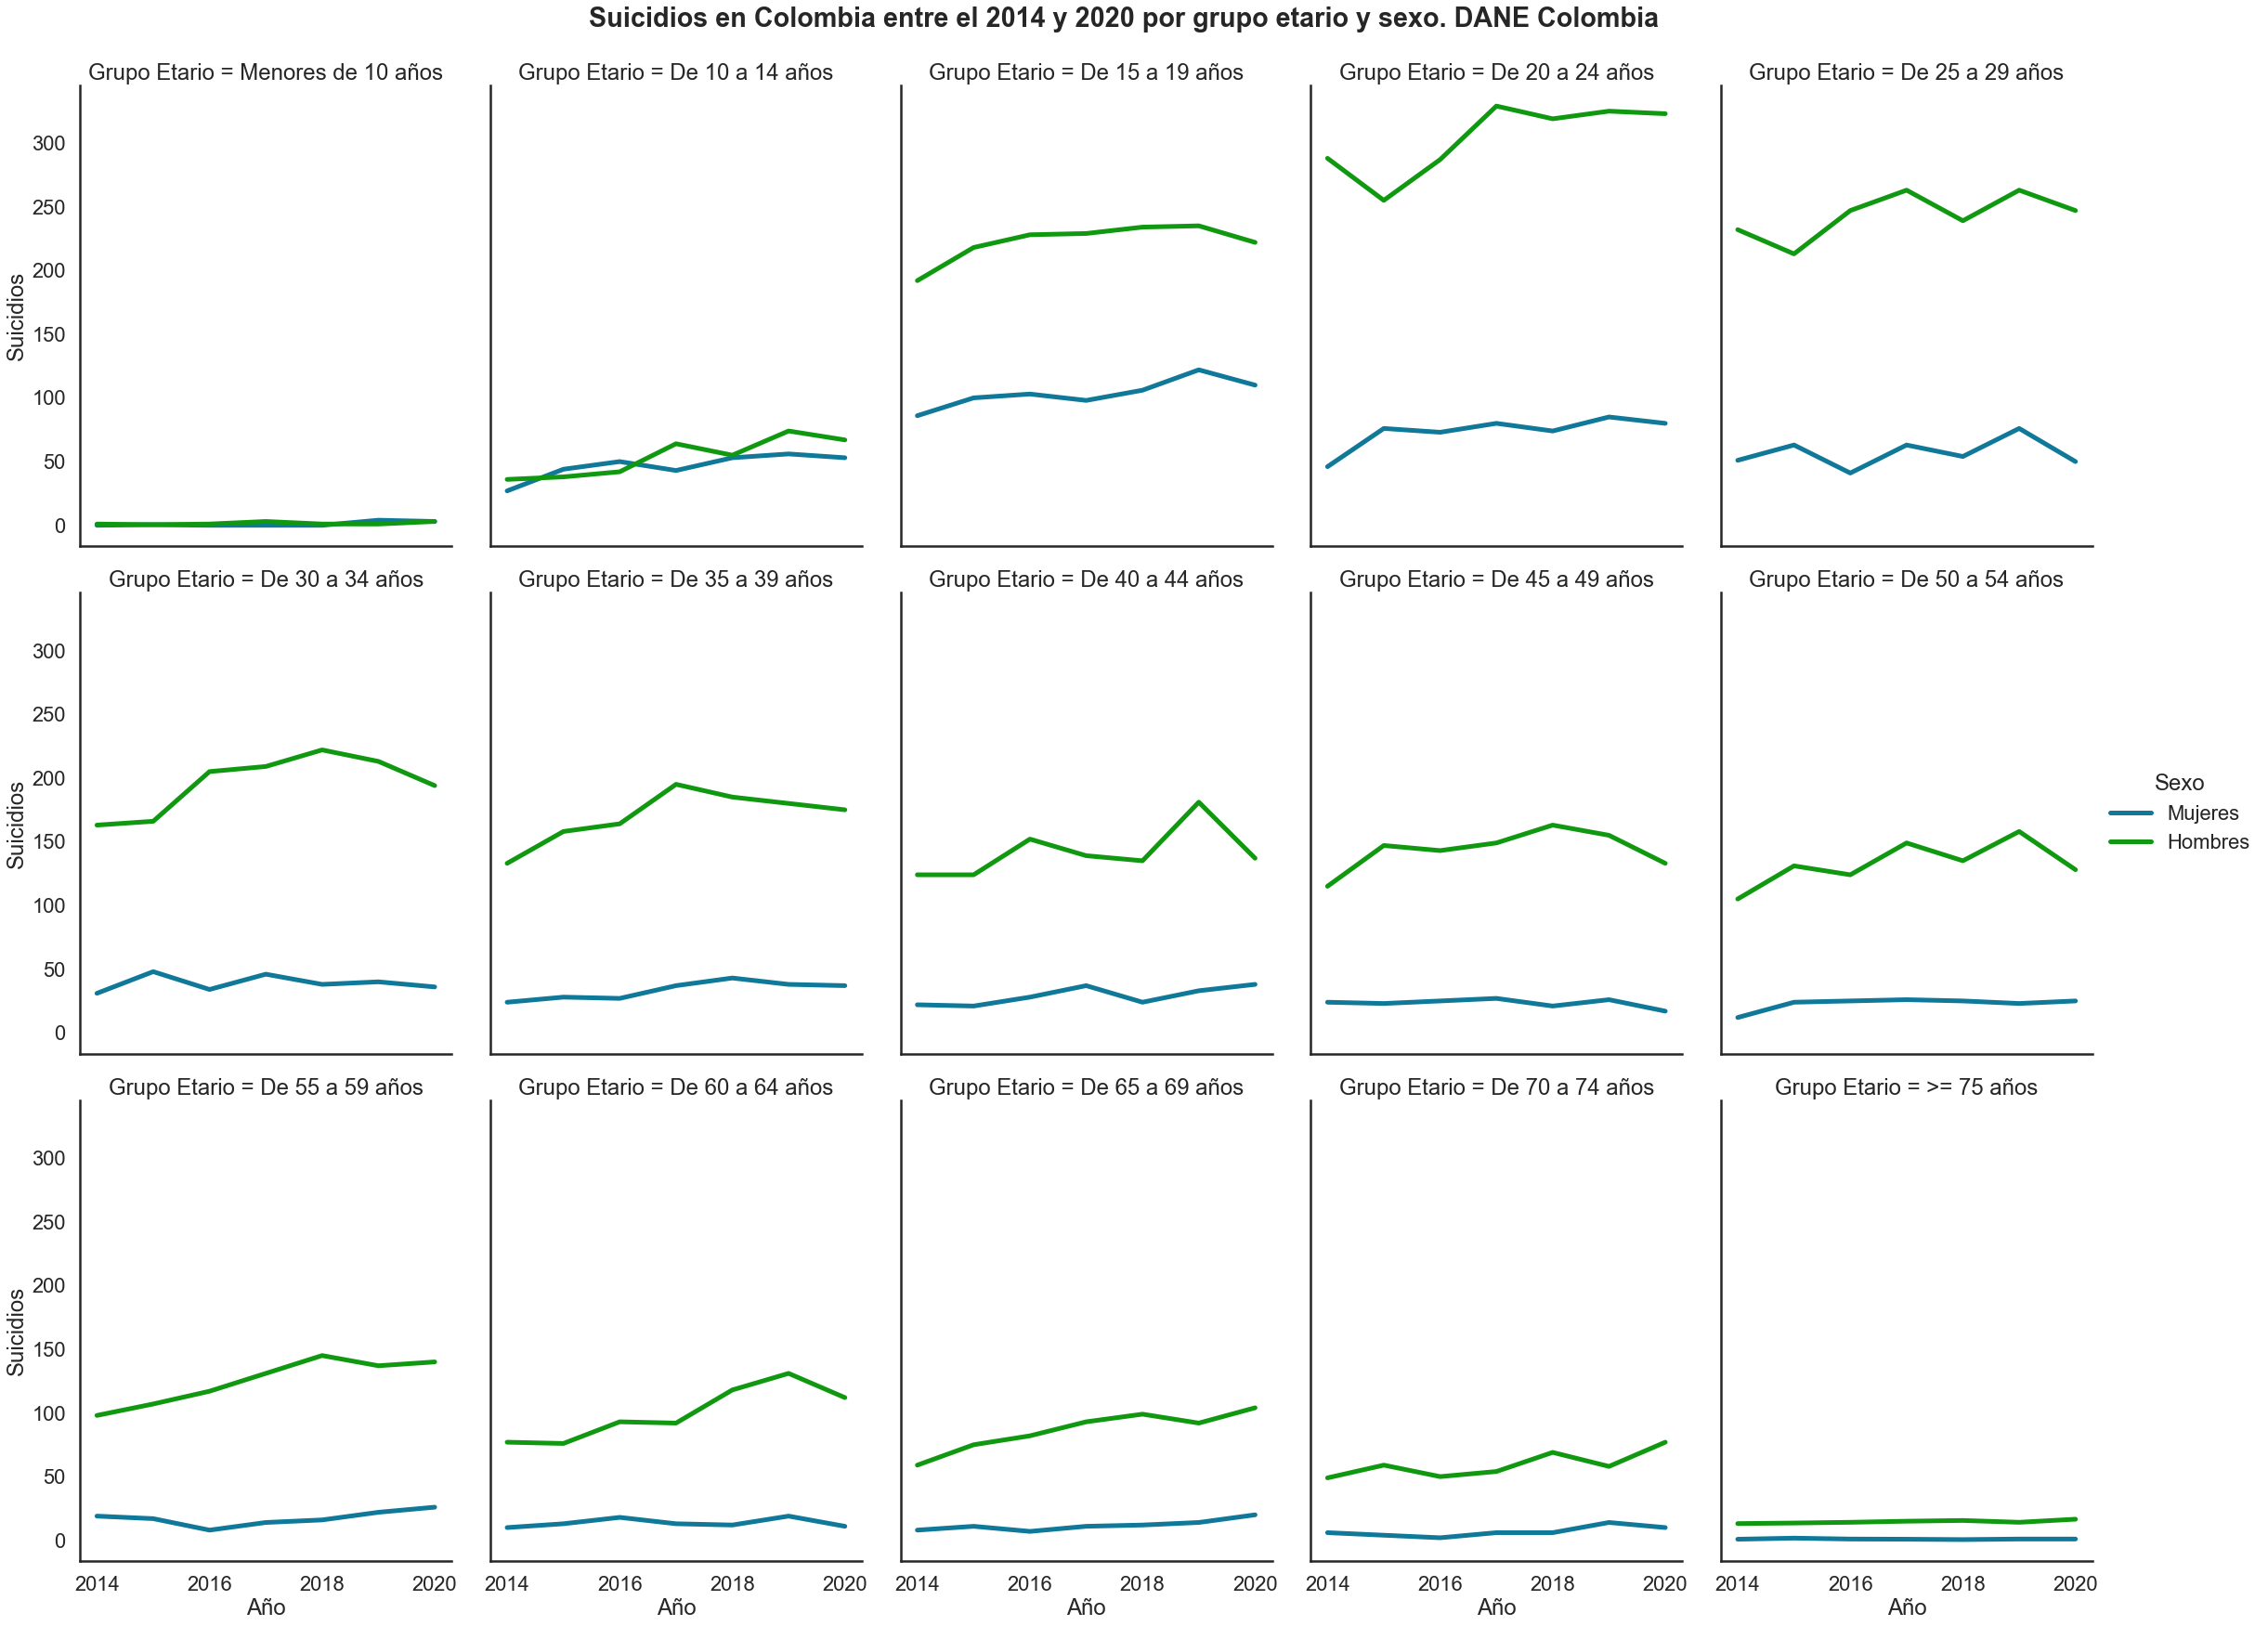

In [13]:
# Ploteamos por sexo y grupos etarios en un mismo gráfico para mejor comparación 
g = sns.set_style("white", {"axes.linewidth":0.5})
g = sns.set_context("poster", rc={"lines.linewidth":5})
g = sns.relplot(x="Año", y="Suicidios", col="Grupo Etario", col_wrap=5, data=suicidios, kind="line",hue="Sexo", height=8, aspect=.8, ci=None, palette=["#107899","#109910"])

g = g.fig.suptitle("Suicidios en Colombia entre el 2014 y 2020 por grupo etario y sexo. DANE Colombia", y=1.02, fontweight="bold")

plt.show()